# Project: Wrangling and Analyze Data

## Data Gathering

In [355]:
import pandas as pd
import re
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import json

# read in WeRateDogs Twitter archive data
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [278]:
# download tweet image prediction
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# save response.content to file
file_path = 'image_predictions.tsv'
with open(file_path, "wb") as file:
    file.write(response.content)

# read file into df
image_predic = pd.read_csv('image_predictions.tsv', sep="\t")

In [279]:
# empty list for storing tweet data
tweet_data = []

# opens file and reads line by line
with open('tweet-json.txt', 'r') as file:
    for line in file:
        # parses the JSON data from each line
        tweet_json = json.loads(line)
        
        # gets the tweet id, retweet count, and favorite count
        tweet_id = tweet_json['id']
        retweet_count = tweet_json.get('retweet_count', 0)
        favorite_count = tweet_json.get('favorite_count', 0)
        
        # appends the data to the list
        tweet_data.append({
            'tweet_id': tweet_id,
            'retweet_count': retweet_count,
            'favorite_count': favorite_count
        })

# converts to a dataframe
df_tweets = pd.DataFrame(tweet_data)

## Assessing Data

In [280]:
# visual assessment
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


In [281]:
# visual assessment
image_predic

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [282]:
# visual assessment
df_tweets

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [283]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [284]:
image_predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [285]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [286]:
# checks for duplicates within df
sum(archive_df.duplicated())

0

In [287]:
# checks for duplicates within df
sum(image_predic.duplicated())

0

In [288]:
# checks for duplicates within df
sum(df_tweets.duplicated())

0

In [289]:
archive_df.rating_denominator.value_counts()

rating_denominator
10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: count, dtype: int64

In [290]:
# create subset of df where denominator is not 10
denom_other = archive_df.query('rating_denominator != 10')

denom_other

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,NaN,NaN,NaN,NaN,NaN
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,NaN,NaN,NaN,NaN,NaN
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,NaN,NaN,NaN,NaN
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN,NaN,NaN,NaN
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,NaN,NaN,NaN,NaN,NaN
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,NaN,NaN,NaN,NaN,NaN
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,NaN,NaN,NaN,NaN,NaN
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,NaN,NaN,NaN,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,NaN,NaN,NaN,NaN,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,NaN,NaN,NaN,NaN


In [291]:
# place those records into a list for visual assessment
denom_list = denom_other.values.tolist()

denom_list

[[835246439529840640,
  8.35245984028504e+17,
  26259576.0,
  '2017-02-24 21:54:03 +0000',
  '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
  "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
  nan,
  nan,
  nan,
  nan,
  960,
  0,
  nan,
  nan,
  nan,
  nan,
  nan],
 [832088576586297345,
  8.320875475599974e+17,
  30582082.0,
  '2017-02-16 04:45:50 +0000',
  '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
  '@docmisterio account started on 11/15/15',
  nan,
  nan,
  nan,
  nan,
  11,
  15,
  nan,
  nan,
  nan,
  nan,
  nan],
 [820690176645140481,
  nan,
  nan,
  '2017-01-15 17:52:40 +0000',
  '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
  'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
  nan,
  nan,
  nan,
  'https://twitter.com/dog_rates/status/820690176645140481

In [292]:
# assessing if names are actual names
archive_df.name.value_counts()

name
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
              ..
Aqua           1
Chase          1
Meatball       1
Rorie          1
Christoper     1
Name: count, Length: 956, dtype: int64

In [293]:
archive_df.query('name == "a"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,NaN,NaN,pupper,NaN
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,NaN,NaN,NaN,NaN
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,NaN,NaN,NaN,NaN
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,NaN,NaN,NaN,NaN
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,NaN,NaN,NaN,NaN
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,NaN,NaN,NaN,NaN
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,NaN,NaN,pupper,NaN
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,NaN,NaN,NaN,NaN
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,NaN,NaN,NaN,NaN
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,NaN,NaN,pupper,NaN


### Quality issues

1. tweet_id should be a string datatype instead of an integer
   
2. Need to drop any rows with data for in_reply_to_status_id or retweeted_status_id since we are not interested in retweeted tweets
   
3. Dataframes are of varying lengths, meaning not all tweets from archive_df have metrics data/ images, tweets without additional info will need to be dropped
   
4. Column names in image_predic are not descriptive (example: img_num, p1, p1_conf, p1_dog), need to be made more descriptive
   
5. img_num doesn't always have correct most confident prediction (example: when p1_dog is false, img_num shouldn't be 1)
    
6. Replace incorrect names with NaN, where there are special characters or first letter isn't capitalized
    
7. The timestamp column is an object datatype instead of a datetime datatype
    
8. Some rating numerators and denominators are incorrectly pulled from the text

### Tidiness issues
1. Dog "stage" should be under one column instead of spread across four columns

2. Need to merge archive_df, df_tweets, and image_predic to have tweet metrics and predictions in one dataframe for analysis and visualization purposes

## Cleaning Data

In [294]:
# Make copies of original pieces of data
archive_copy = archive_df.copy()
image_copy = image_predic.copy()
tweets_copy = df_tweets.copy()

### Issue #1:

#### Define:

Convert tweet_id to a string datatype instead of an integer datatype.

#### Code

In [295]:
# converts tweet id from int to str
archive_copy['tweet_id'] = archive_copy['tweet_id'].astype(str)
image_copy['tweet_id'] = image_copy['tweet_id'].astype(str)
tweets_copy['tweet_id'] = tweets_copy['tweet_id'].astype(str)

#### Test

In [296]:
print(archive_copy.dtypes)

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object


In [297]:
print(image_copy.dtypes)

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object


In [298]:
print(tweets_copy.dtypes)

tweet_id          object
retweet_count      int64
favorite_count     int64
dtype: object


### Issue #2:

#### Define: 

Drop any rows with non-null values for in_reply_to_status_id or retweeted_status_id to ensure dataframe only has original ratings.

#### Code

In [299]:
# keeps only records where in_reply_to_status_id is null, meaning it is an original tweet
archive_clean = archive_copy[archive_copy['in_reply_to_status_id'].isnull()]

In [300]:
# keeps only records where retweeted_status_id is null, meaning it is an original tweet
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

#### Test

In [301]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        1494 non-null   object 
 13  doggo                       83 non-nul

### Issue #3:

#### Define

Ratings without images and metrics need to be dropped from the dataframe, there are differences in lengths for archive_df, image_predic, and df_tweets, meaning some ratings do not have accompanying images or metrics.

#### Code

In [302]:
# placing all tweet id's from image_copy into a list
img_id_list = image_copy['tweet_id'].tolist()

# returns achive_clean with only tweet id's also found in image_copy
archive_clean = archive_clean[archive_clean['tweet_id'].isin(img_id_list)]

#### Test

In [303]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1971 non-null   object 
 10  rating_numerator            1971 non-null   int64  
 11  rating_denominator          1971 non-null   int64  
 12  name                        1447 non-null   object 
 13  doggo                       73 non-nul

### Issue #4:

#### Define:

Update column names in image_copy to be more descriptive as img_num, p1, p1_conf, p1_dog are not intuitive column names.

#### Code

In [304]:
# renaming columns in image_copy to be more descriptive
image_clean = image_copy.rename(columns={'img_num': 'likely_prediction',
                                        'p1': 'prediction_1', 'p1_conf': 'prediction_1_confidence',
                                        'p1_dog': 'is_prediction1_dog', 'p2': 'prediction_2',
                                        'p2_conf': 'prediction_2_confidence',
                                        'p2_dog': 'is_prediction2_dog',
                                        'p3': 'prediction_3', 'p3_conf': 'prediction_3_confidence',
                                        'p3_dog': 'is_prediction3_dog'})

#### Test

In [305]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 2075 non-null   object 
 1   jpg_url                  2075 non-null   object 
 2   likely_prediction        2075 non-null   int64  
 3   prediction_1             2075 non-null   object 
 4   prediction_1_confidence  2075 non-null   float64
 5   is_prediction1_dog       2075 non-null   bool   
 6   prediction_2             2075 non-null   object 
 7   prediction_2_confidence  2075 non-null   float64
 8   is_prediction2_dog       2075 non-null   bool   
 9   prediction_3             2075 non-null   object 
 10  prediction_3_confidence  2075 non-null   float64
 11  is_prediction3_dog       2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #5:

#### Define:

Correct likely_prediction to display the most confident prediction, excluding where a prediction is not a dog (example: p1_dog = False).

#### Code

In [306]:
# function that checks if the prediction is a dog and then finds the max confidence
def correct_likely_prediction(row):

    dog_confidences = {}
    
    for i in range(1, 4):
        if row[f'is_prediction{i}_dog'] == True:
            dog_confidences[i] = row[f'prediction_{i}_confidence']

    if dog_confidences:
        likely_prediction = max(dog_confidences, key=dog_confidences.get)
    else:
        # if no prediction is a dog breed, set to 0
        likely_prediction = 0

    return likely_prediction

# apply function to image_copy df
image_clean['likely_prediction'] = image_clean.apply(correct_likely_prediction, axis=1)

#### Test

In [307]:
image_clean.query('likely_prediction == 0')

,tweet_id,jpg_url,likely_prediction,prediction_1,prediction_1_confidence,is_prediction1_dog,prediction_2,prediction_2_confidence,is_prediction2_dog,prediction_3,prediction_3_confidence,is_prediction3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,0,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,0,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,0,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,0,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,0,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,0,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,0,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,0,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,0,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


### Issue #6:

#### Define:

Drop names with special characters or where first letter of name is not capitalized as it is probably not a correct name.

#### Code

In [308]:
# replace name with NaN if it has special characters or is not capitalized
archive_clean['name'] = archive_clean['name'].replace(to_replace='^[a-z]|[^a-zA-Z]', value=np.nan, regex=True)

#### Test

In [309]:
archive_clean.name.value_counts()

name
Charlie       11
Oliver        10
Lucy          10
Cooper        10
Penny          9
              ..
Divine         1
Tripp          1
Cora           1
Huxley         1
Christoper     1
Name: count, Length: 905, dtype: int64

In [310]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1971 non-null   object 
 10  rating_numerator            1971 non-null   int64  
 11  rating_denominator          1971 non-null   int64  
 12  name                        1340 non-null   object 
 13  doggo                       73 non-nul

### Issue #7:

#### Define:

Convert timestamp column to datetime datatype instead of object datatype.

#### Code

In [311]:
# converts timestamp column to datetime datatype
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [312]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1971 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1971 non-null   datetime64[ns, UTC]
 4   source                      1971 non-null   object             
 5   text                        1971 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1971 non-null   object             
 10  rating_numerator            1971 non-null   int64              
 

### Issue #8:

#### Define:

Extract correct rating numerators and denominators from text in archive_df to replace incorrect values.

#### Code

In [313]:
# function that extracts the last 'number/number' pattern and split it into numerator/denominator
def extract_last_rating(text):
    
    pattern = r'(\d+(?:\.\d+)?)/(\d+)'
    # finds each match to pattern
    matches = re.findall(pattern, text)
    # returns last match and splits into numerator,denominator
    return matches[-1] if matches else (None, None)

# apply function to text column in archive_clean
archive_clean[['rating_numerator', 'rating_denominator']] = archive_clean['text'].apply(
    lambda x: pd.Series(extract_last_rating(x))
)

In [314]:
# converts rating for 24/7 to NaN since there is no rating in that tweet
archive_clean.loc[archive_clean['rating_denominator'] == "7", ['rating_numerator', 'rating_denominator']] = np.nan

#### Test

In [315]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1971 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1971 non-null   datetime64[ns, UTC]
 4   source                      1971 non-null   object             
 5   text                        1971 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1971 non-null   object             
 10  rating_numerator            1970 non-null   object             
 

In [316]:
archive_clean.rating_denominator.value_counts()

rating_denominator
10     1959
80        2
50        2
70        1
150       1
170       1
90        1
40        1
110       1
120       1
Name: count, dtype: int64

### Issue #9:

#### Define:

Create a new column for dog_stage to replace the four columns (doggo, puppo, pupper, floofer).

#### Code

In [317]:
# finds where doggo, floofer, pupper, and puppo are not null
dog_stages = [
    archive_clean['doggo'].notnull(),
    archive_clean['floofer'].notnull(),
    archive_clean['pupper'].notnull(),
    archive_clean['puppo'].notnull(),
]

# list of stages
stages = ['doggo', 'floofer', 'pupper', 'puppo']

# select based on dog_stages and if no stage is found, put NaN
archive_clean['dog_stage'] = np.select(dog_stages, stages, default=np.nan)

# drop the original columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [318]:
archive_clean.dog_stage.value_counts()

dog_stage
nan        1668
pupper      201
doggo        73
puppo        22
floofer       7
Name: count, dtype: int64

In [319]:
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,nan
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,nan
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,nan
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,nan
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,nan
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,nan
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,nan
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,nan


### Issue #10:

#### Define:

Merge archive_df, df_tweets, and image_predic into one dataframe for analysis and visualization purposes.

#### Code

In [344]:
final_df = pd.merge(archive_clean, image_clean, on=['tweet_id'], how="inner").merge(tweets_copy, on=['tweet_id'], how="inner")
final_df.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                      'retweeted_status_user_id', 'retweeted_status_timestamp',
                       'source', 'jpg_url'], inplace=True)

#### Test

In [345]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   tweet_id                 1971 non-null   object             
 1   timestamp                1971 non-null   datetime64[ns, UTC]
 2   text                     1971 non-null   object             
 3   expanded_urls            1971 non-null   object             
 4   rating_numerator         1970 non-null   object             
 5   rating_denominator       1970 non-null   object             
 6   name                     1340 non-null   object             
 7   dog_stage                1971 non-null   object             
 8   likely_prediction        1971 non-null   int64              
 9   prediction_1             1971 non-null   object             
 10  prediction_1_confidence  1971 non-null   float64            
 11  is_prediction1_dog       1971 

## Storing Data

In [346]:
# write final_df to csv file for storage
final_df.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data

In [349]:
# find index where retweet_count is highest
max_retweet_index = final_df['retweet_count'].idxmax()

# finds index where retweet_count is lowest
min_retweet_index = final_df['retweet_count'].idxmin()

# locate these records
rt_max_min = final_df.loc[[min_retweet_index, max_retweet_index]]

# displays record
rt_max_min

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,likely_prediction,prediction_1,prediction_1_confidence,is_prediction1_dog,prediction_2,prediction_2_confidence,is_prediction2_dog,prediction_3,prediction_3_confidence,is_prediction3_dog,retweet_count,favorite_count
1954,666102155909144576,2015-11-16 03:55:04+00:00,Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11,10,NaN,nan,1,English_setter,0.298617,True,Newfoundland,0.149842,True,borzoi,0.133649,True,16,81
769,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,doggo,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,79515,131075


In [350]:
# convert rating_numerator and rating_denominator to numeric
final_df['rating_numerator'] = pd.to_numeric(final_df['rating_numerator'])
final_df['rating_denominator'] = pd.to_numeric(final_df['rating_denominator'])

# calculate the rating percentage
final_df['rating_percentage'] = (final_df['rating_numerator'] / final_df['rating_denominator']) * 100

# find the index of the highest rating percentage
max_rating_index = final_df['rating_percentage'].idxmax()
min_rating_index = final_df['rating_percentage'].idxmin()

# use the index to find record that has the max rating
rating_min_max = final_df.loc[[min_rating_index, max_rating_index]]

# view as a list to access tweet link
rating_min_max.values.tolist()

[['835152434251116546',
  Timestamp('2017-02-24 15:40:31+0000', tz='UTC'),
  "When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag",
  'https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1',
  0.0,
  10.0,
  nan,
  'nan',
  2,
  'swing',
  0.967066,
  False,
  'American_Staffordshire_terrier',
  0.0127309,
  True,
  'Staffordshire_bullterrier',
  0.00703922,
  True,
  3443,
  24574,
  0.0],
 ['749981277374128128',
  Timestamp('2016-07-04 15:00:45+0000', tz='UTC'),
  "This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh",
  'https://twitter.com/dog_rates/status/749981277374128128/photo/1',
  1776.0,
  10.0,
  'Atticus',
  'nan',
  0,
  'bow_tie',
  0.533941,
  False,
  'sunglasses',
  0.0808222,
  False,
  'sunglass',
  0.0507761999999999,
  False,
  2772,
  5569,


In [343]:
# finds average rating percentage for each dog_stage
avg_rating_by_dog_stage = final_df.groupby('dog_stage')['rating_percentage'].mean()

avg_rating_by_dog_stage

dog_stage
doggo      117.945205
floofer    120.000000
nan        117.459568
pupper     106.232338
puppo      120.000000
Name: rating_percentage, dtype: float64

### Insights:
1. The tweet with the highest retweet count is classified as a doggo while the tweet with the lowest retweet count is not classified as any dog stage. 

2. The tweet with the highest rating percentage is 17760%, because the tweet is making a play on America's revolution year. The tweet with the lowest rating percentage is 0%, because the tweet is calling out another page for plagarism. 

3. The dog stages with the highest average rating percentage are floofer and puppo who have the same average rating percentage. The dog stage with the lowest average rating percentage is pupper.

### Visualization

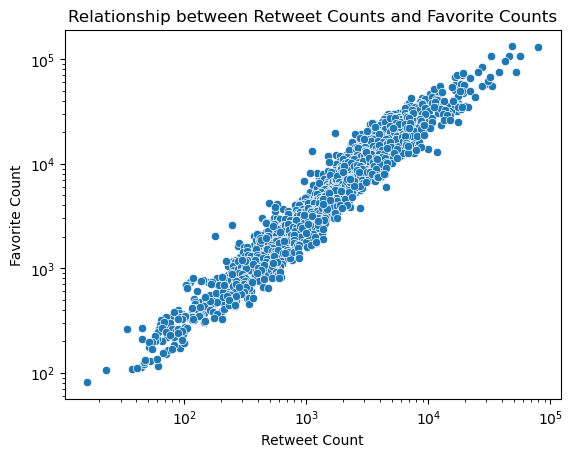

In [362]:
%matplotlib inline

# create scatter plot of retweet_count vs favorite_count
sns.scatterplot(data=final_df, x='retweet_count', y='favorite_count')

# axis and graph labels
plt.title('Relationship between Retweet Counts and Favorite Counts')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')

# changing axis scale to log to get a better view of the relationship
plt.xscale('log')
plt.yscale('log')

plt.show()